<a href="https://colab.research.google.com/github/asriverosn/Weather-CL/blob/main/weather-Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

     |████████████████████████████████| 65 kB 4.2 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638771 sha256=e41d9e6585e7db79725593cc98f22d30dbf20aabd66949162984a051300a31f7
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
from prophet import Prophet

In [3]:
import pandas as pd
import numpy as np

In [60]:
df=pd.read_csv('https://raw.githubusercontent.com/asriverosn/Weather-CL/main/EC_series%20(2).csv')
df.tail()

,agno,mes,dia,valor
26109,2021,7,23,21.2
26110,2021,7,24,11.1
26111,2021,7,25,17.2
26112,2021,7,26,15.7
26113,2021,7,27,17.9


In [61]:
df=df.rename(columns={df.columns[1]:'mes',
df.columns[2]:'dia',
df.columns[3]:'valor'})
df

,agno,mes,dia,valor
0,1950,1,1,28.5
1,1950,1,2,27.6
2,1950,1,3,27.0
3,1950,1,4,29.6
4,1950,1,5,29.0
...,...,...,...,...
26109,2021,7,23,21.2
26110,2021,7,24,11.1
26111,2021,7,25,17.2
26112,2021,7,26,15.7


In [66]:
df=df.astype({'agno': 'str','mes':'str','dia':'str'})

In [69]:
df['date']=df['agno']+'-'+df['mes']+'-'+df['dia']
df.head()

,agno,mes,dia,valor,date
0,1950,1,1,28.5,1950-1-1
1,1950,1,2,27.6,1950-1-2
2,1950,1,3,27.0,1950-1-3
3,1950,1,4,29.6,1950-1-4
4,1950,1,5,29.0,1950-1-5


In [75]:
df_pcl=pd.DataFrame() 
df_pcl['ds']=df['date']
df_pcl['y']=df['valor']
df_pcl=df_pcl.set_index('ds',drop=False)
df_pcl.head()
df_pcl.head()

,ds,y
ds,,
1950-1-1,1950-1-1,28.5
1950-1-2,1950-1-2,27.6
1950-1-3,1950-1-3,27.0
1950-1-4,1950-1-4,29.6
1950-1-5,1950-1-5,29.0


In [ ]:
df_pcl=df_cl[['time', 'temperatureMax']].rename(columns={'time':'ds','temperatureMax':'y'}).reset_index()
df_pcl=df_pcl[df_pcl.columns[1:]]

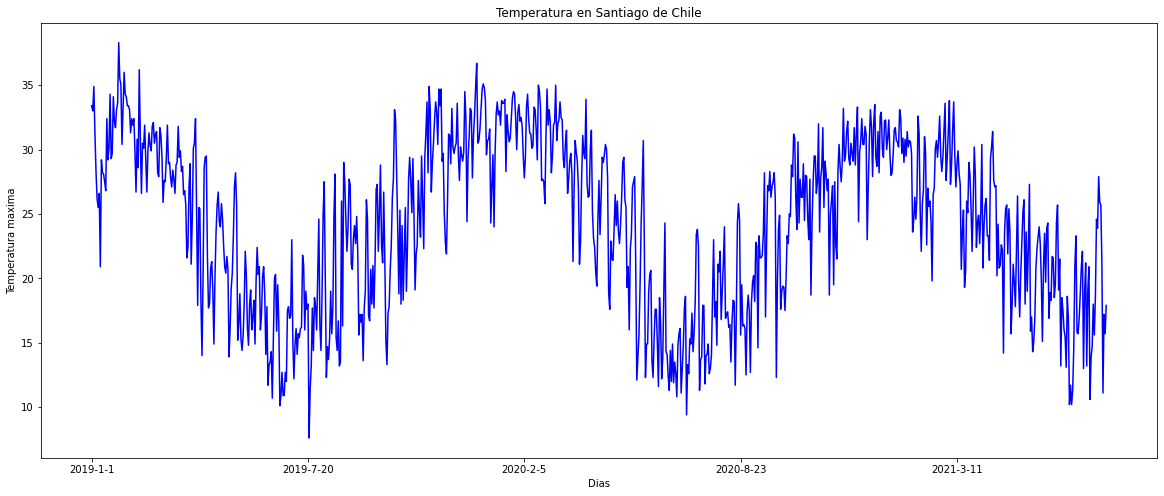

In [82]:
from matplotlib import pyplot as plt 

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
df_pcl[df_pcl['ds'][df_pcl['ds']=='2019-1-1'].index[0]:]['y'].plot(ax=ax, color='b')
#daily_mean.plot(ax=ax, color='r')
#ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Dias')
ax.set_ylabel('Temperatura maxima')
plt.title('Temperatura en Santiago de Chile')
#plt.savefig('plots/ch2/B07887_02_17.png', format='png', dpi=300)
plt.show()